# Customer Segmentation using KMeans Clustering

### In this Customer Segmentation project there are preprocessing, clustering, visualization, and segment analysis is completed

In [8]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%pip install joblib
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


## Data Exploration

### Reads the Mall Customers dataset

In [9]:
df = pd.read_csv(r"C:\Users\Public\Downloads\Data Science Internship ArchTechnologies\Github_Tasks_2nd_Month\Customer_Segementation_Mall\Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [10]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# Check for missing values and duplicates
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Rows: 0


## Exploratory Data Analysis (EDA)

### Visualizes distributions, outliers, and relationships

In [12]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

### Gender distribution

In [13]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

### Pairwise relationships


In [14]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

### Boxplots for outlier detection


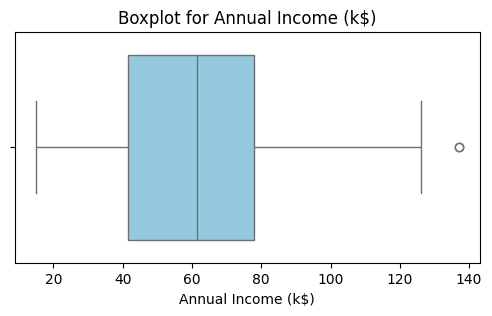

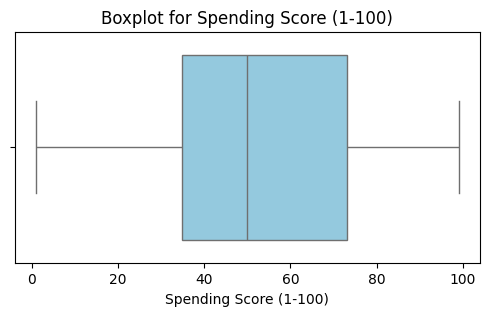

In [15]:
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.show()

## Feature Selection/Scaling

### Uses StandardScaler for normalization

In [16]:
# Using Annual Income and Spending Score for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [17]:
# Scaling the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Features selected and scaled successfully!")


 Features selected and scaled successfully!


## Elbow Method

### Finding the Optimal Number of Clusters

### Determines optimal K (clusters)

In [18]:
wcss = []  # Within Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

### Plot the elbow curve

In [19]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='s', color='orange')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

## Apply KMeans with Optimal K


### Groups customers based on behavior

In [20]:
# From the elbow plot, usually 5 clusters are optimal
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [21]:
# Add cluster labels to the dataframe
df['Cluster'] = y_kmeans

print("\n KMeans Clustering Completed!")
print(df.head())



 KMeans Clustering Completed!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [22]:
kmeans.predict([[15, 39]])

array([1])

## Visualize the Clusters


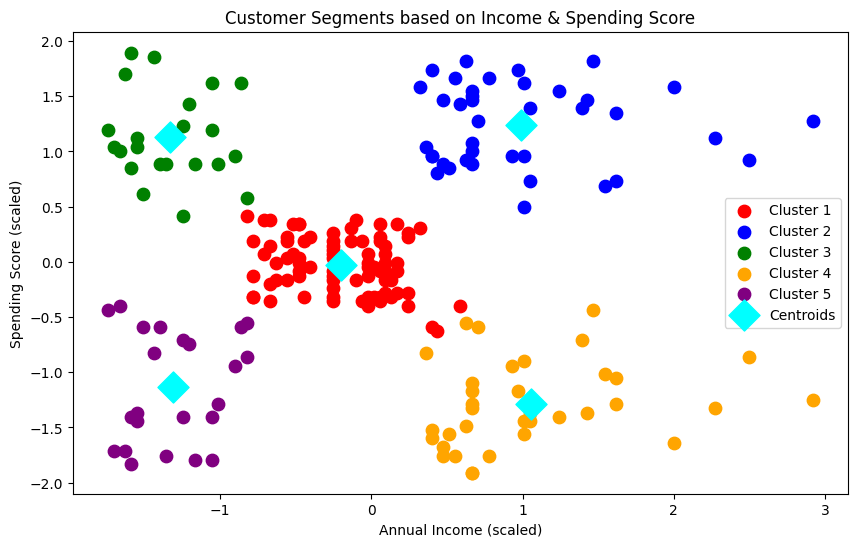

In [23]:
plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(5):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1],
                s=80, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c='cyan', marker='D', label='Centroids')

plt.title('Customer Segments based on Income & Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

## Analyze Cluster Characteristics



📊 Cluster Characteristics:



Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391

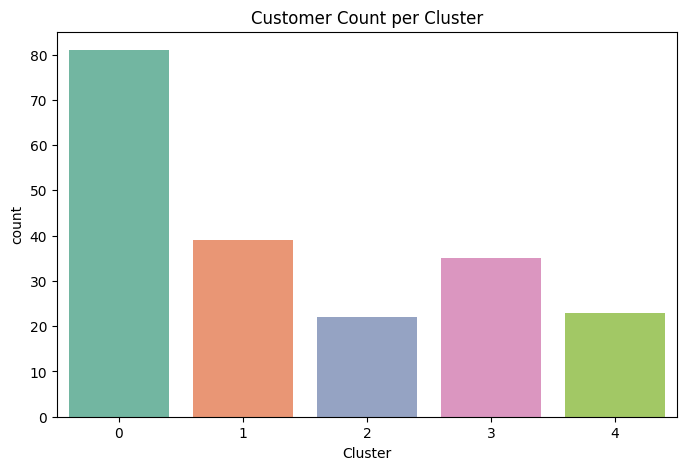

In [24]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print("\n📊 Cluster Characteristics:\n")
display(cluster_summary)

# Visualize cluster distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Customer Count per Cluster')
plt.show()


The number of customers in each cluster.

Helps understand which segment is largest or smallest.

### Insight:

Cluster 0 has the highest number of customers.

Clusters 2 and 4 have fewer customers, meaning those groups are more specific/niche.

## Cluster Insights

### Summarizes cluster means and profiles

| Clusters      | Description                                            |
| ------------- | ------------------------------------------------------ |
| **Cluster 1** | High income, high spending — “Luxury Shoppers”         |
| **Cluster 2** | Low income, low spending — “Budget Customers”          |
| **Cluster 3** | Average income, average spending — “Standard Shoppers” |
| **Cluster 4** | High income, low spending — “Careful Spenders”         |
| **Cluster 5** | Low income, high spending — “Impulsive Buyers”         |


## 3D Visualization (Age, Income, Spending Score)

### 3D scatter plot for segments

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='viridis', s=60)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Visualization of Customer Clusters')
plt.show()

It shows how customers are grouped in 3D space.

Helps see clusters separated by:

Age differences

Income levels

Spending behavior

In [33]:
import joblib
joblib.dump(kmeans, "Customer_Segmentation")


['Customer_Segmentation']

In [34]:
model = joblib.load("Customer_Segmentation")

model.predict([[15, 39]])

array([1])